In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df_data = pd.read_csv('./kaggle_data/data.csv', delimiter=',')
df_data_w_generes = pd.read_csv('./kaggle_data/data_w_genres.csv', delimiter=',')
df_data_by_artist = pd.read_csv('./kaggle_data/data_by_artist.csv', delimiter=',')
df_data_by_genres = pd.read_csv('./kaggle_data/data_by_genres.csv', delimiter=',')
df_data_by_year = pd.read_csv('./kaggle_data/data_by_year.csv', delimiter=',')


In [2]:
df_data.loc[df_data['artists'] == '[\'Metallica\']']

df_new = df_data.copy()

df_new = df_new.drop(columns=['id', 'acousticness', 'explicit', 'energy', 'release_date', 'mode', 'key'])
df_new.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,['Carl Woitschach'],0.708,158648,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,['Seweryn Goszczyński'],0.749,104300,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,['Francisco Canaro'],0.781,180760,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


In [3]:
df_new.corr()

,danceability,duration_ms,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
danceability,1.000000,-0.134500,-0.281429,-0.105532,0.294170,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.134500,1.000000,0.084814,0.034270,-0.014687,0.063292,-0.058449,-0.028816,-0.198760,0.076293
instrumentalness,-0.281429,0.084814,1.000000,-0.047397,-0.417033,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
liveness,-0.105532,0.034270,-0.047397,1.000000,0.052985,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,0.294170,-0.014687,-0.417033,0.052985,1.000000,0.466546,-0.105796,0.211114,0.308418,0.490118
popularity,0.221077,0.063292,-0.299829,-0.075293,0.466546,1.000000,-0.135707,0.135047,0.009327,0.880724
speechiness,0.225305,-0.058449,-0.115735,0.147667,-0.105796,-0.135707,1.000000,-0.010070,0.056383,-0.120937
tempo,-0.004872,-0.028816,-0.107570,0.008124,0.211114,0.135047,-0.010070,1.000000,0.171182,0.137892
valence,0.560242,-0.198760,-0.193929,-0.000426,0.308418,0.009327,0.056383,0.171182,1.000000,-0.029304
year,0.203430,0.076293,-0.291571,-0.055839,0.490118,0.880724,-0.120937,0.137892,-0.029304,1.000000


In [4]:
df_new.drop(df_new[df_new.duration_ms < 90000].index, inplace=True)
print(f"Wszystkie dane: {df_data.shape[0]}")
print(f"Zachowane dane: {df_new.shape[0]}")
print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0]/ df_data.shape[0]}%")

Wszystkie dane: 169909
Zachowane dane: 165877
Usuniety % wszystkich rekordów: 0.023730349775468063%


In [5]:
#temp = df_new.shape[0]
#df_new.drop(df_new[df_new.popularity == 0].index, inplace=True)
#print(f"Wszystkie dane: {df_data.shape[0]}")
#print(f"Zachowane dane: {df_new.shape[0]}")
#print(f"Usuniety % wszystkich rekordów: {1 - df_new.shape[0] / df_data.shape[0]}%")
#print("wliczamy wszystkie poprzednie operacje - czyli usunelismy te o durr < 90 i pop = 0")

# Wykresy

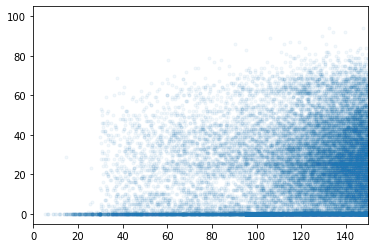

In [6]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.popularity
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

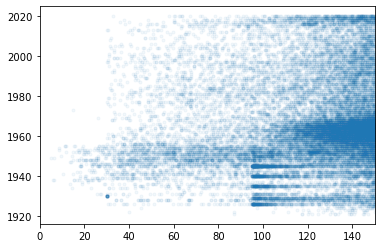

In [7]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.year
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

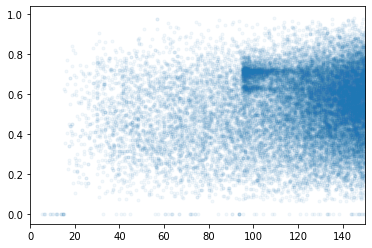

In [8]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.danceability
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

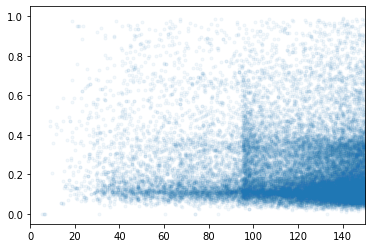

In [9]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.liveness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

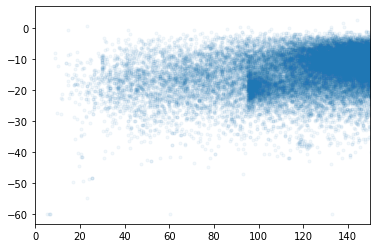

In [10]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.loudness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

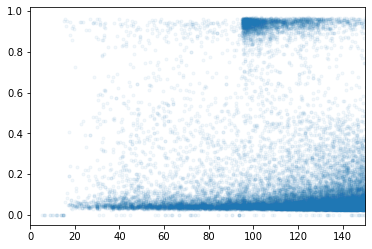

In [11]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.speechiness
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

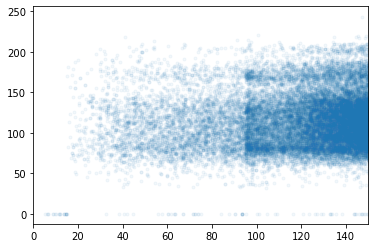

In [12]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.tempo
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

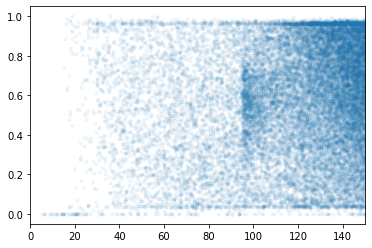

In [13]:
x = df_data.duration_ms
x = list(map(lambda a: a/1000, x))
y = df_data.valence
plt.xlim(0, 150)
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')

[27357, 24265, 50341, 50637, 16737, 572]

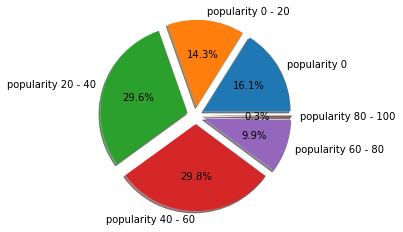

In [15]:
sectors = [0,0,0,0,0,0]
def divider(a):
    if(a==0):
        sectors[0] += 1
    elif(a < 20):
        sectors[1] += 1
    elif(a < 40):
        sectors[2] += 1
    elif(a < 60):
        sectors[3] += 1
    elif(a < 80):
        sectors[4] += 1
    else:
        sectors[5] += 1

x = df_data.popularity

labels = ['popularity 0',
          'popularity 0 - 20',
          'popularity 20 - 40',
          'popularity 40 - 60',
          'popularity 60 - 80',
          'popularity 80 - 100']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
for a in x:
    divider(a)

plt.pie(sectors, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True)
sectors

In [16]:
df_temp = df_new.copy()

df_temp.drop(df_temp[df_temp.popularity != 0].index, inplace=True)

df_temp.head(5)

,artists,danceability,duration_ms,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,['Carl Woitschach'],0.708,158648,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,['Seweryn Goszczyński'],0.749,104300,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,['Francisco Canaro'],0.781,180760,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
5,"['Felix Mendelssohn', 'Vladimir Horowitz']",0.424,352600,0.911,0.0915,-19.242,Scherzo a capriccio: Presto,0,0.0593,63.521,0.2660,1928


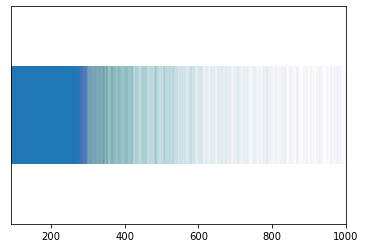

In [17]:
x = df_temp.duration_ms
x = list(map(lambda a: a/1000, x))
plt.xlim(90, 1000)
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

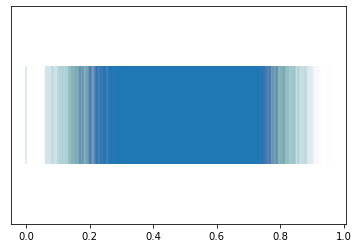

In [18]:
x = df_temp.danceability
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

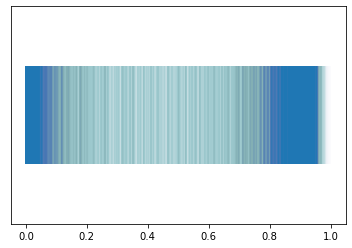

In [19]:
x = df_temp.instrumentalness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

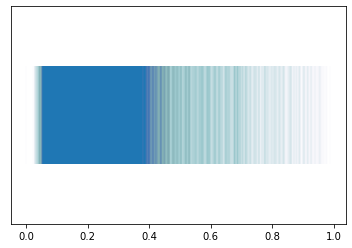

In [20]:
x = df_temp.liveness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

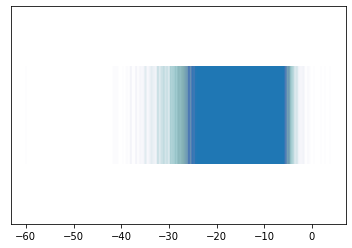

In [21]:
x = df_temp.loudness
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

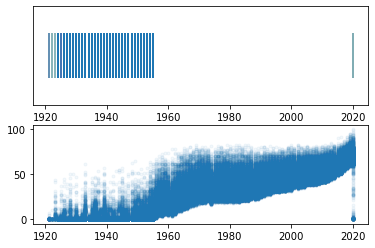

In [33]:
plt.subplot(2, 1, 1)
x = df_temp.year
plt.yticks([])
plt.eventplot(x, alpha=0.01, cmap='viridis')

plt.subplot(2, 1, 2)
x = df_data.year
y = df_data.popularity
plt.scatter(x, y, marker='.', alpha=0.05, cmap='viridis')